# Machine Learning models

### 1. Necessary python libraries imported

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import sklearn.metrics as sm
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix

### 2. Dataset is split into train and testing sets

In [2]:
# Reading the data from the 'heart_data.csv' file
data = pd.read_csv('heart_data.csv')

In [3]:
# Separate target column from the rest of the features
X = data.iloc[:, 0:13] # Features
y = data.iloc[:, 13] # Target variable

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,45,1,1,110,264,0,0,132,0,1.2,2,0,7
280,68,1,4,144,193,1,0,141,0,3.4,2,2,7
281,57,1,4,130,131,0,0,115,1,1.2,2,1,7
282,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [5]:
y

0      0
1      1
2      1
3      0
4      0
      ..
279    1
280    1
281    1
282    1
283    0
Name: target, Length: 284, dtype: int64

In [6]:
# y = y.values.reshape(-1,1)
# print(y)
# print(f'Shape of y: {y.shape}')

In [7]:
print(f'Shape of y: {y.shape}')

Shape of y: (284,)


In [8]:
# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
print(f'Shape of training data: {X_train.shape}, shape of test data: {X_test.shape} and shape of original data: {X.shape}')

Shape of training data: (227, 13), shape of test data: (57, 13) and shape of original data: (284, 13)


### 3. Function is applied to all classification models

In [10]:
# Function 
def evaluate_model(model):
    
    # Training the model
    model = model.fit(X_train, y_train)
    
    # Predictions from train data (as close to 100% as possible)
    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    print(f'Accuracy of model predicting from training data: {accuracy_train} \n')
    
    # Predictions from test data
    predictions_test = model.predict(X_test)
 
    # Printing classification report
    print(f'Classification Report:\n {classification_report(y_test, predictions_test)}')

    # Generating ROC curve
    # predict_proba() returns probability that target = 0 (1st column) and probability that target = 1 (2nd column)
    y_scores = model.predict_proba(X_test)
    # Extracting the probability for which target = 1 (patient has heart disease)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

    # Displaying ROC curve
    fig = plt.figure(figsize=(8, 8))
    # Diagonal 50% line
    plt.plot([0, 1], [0, 1], '--', color='grey')
    # Plotting the FPR and TPR produced by the model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
    plt.title('ROC Curve', fontsize=16)
    plt.show()
    
    # Generating evaluation metrics
    matrix = confusion_matrix(y_test, predictions_test, labels=[0, 1])
    results = [accuracy_score(y_test, predictions_test), precision_score(y_test, predictions_test), recall_score(y_test, predictions_test),
                  roc_auc_score(y_test, y_scores[:, 1])]
    print(f'Confusion Matrix:\n {matrix} \n')
    print(f'Accuracy:  {results[0]}')
    print(f'Precision: {results[1]}')
    print(f'Recall:    {results[2]}')
    print(f'AUC:       {str(results[3])} \n')
    
    # Displaying confusion matrix (more pleasing to the eye)
    print(f'Confusion Matrix Heatmap:\n {plot_confusion_matrix(model, X_test, y_test)} \n')

    # Cross Validation
    # Estimators are classifiers and target is binary so StratifiedKFold is used by default
    cv = cross_val_score(model, X, y, cv=5)
    print(f'Cross Validation\n Scores: {cv}')
    print(f'Average: {cv.mean()}')
    print(f'Standard Deviation: {cv.std()}')
    
    return((model, cv, results))

### 4. Support Vector Classifier

Accuracy of model predicting from training data: 0.8546255506607929 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.96      0.73      0.83        30

    accuracy                           0.84        57
   macro avg       0.86      0.85      0.84        57
weighted avg       0.87      0.84      0.84        57



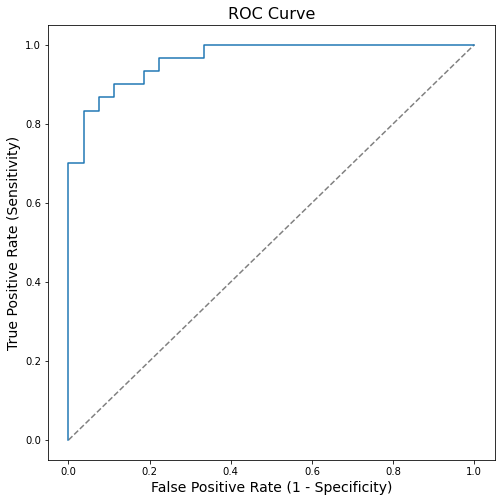

Confusion Matrix:
 [[26  1]
 [ 8 22]] 

Accuracy:  0.8421052631578947
Precision: 0.9565217391304348
Recall:    0.7333333333333333
AUC:       0.9641975308641976 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.84210526 0.87719298 0.78947368 0.87719298 0.78571429]
Average: 0.8343358395989975
Standard Deviation: 0.04027530712100382


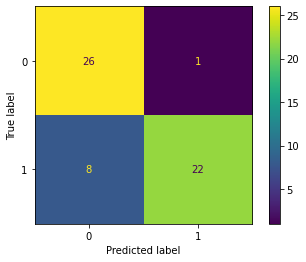

In [11]:
SVC_model, SVC_cv, SVC_results = evaluate_model(SVC(kernel='linear', random_state=0, probability=True))

Accuracy of model predicting from training data: 0.8546255506607929 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.96      0.73      0.83        30

    accuracy                           0.84        57
   macro avg       0.86      0.85      0.84        57
weighted avg       0.87      0.84      0.84        57



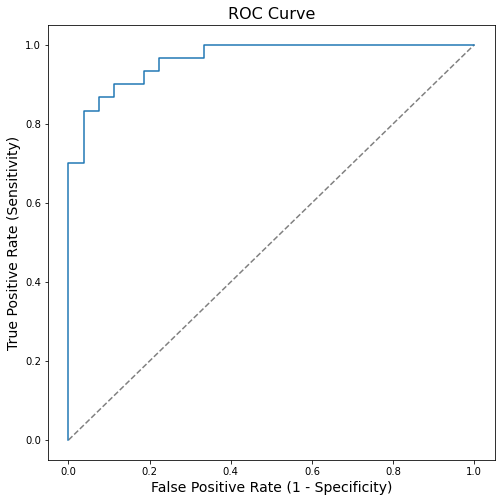

Confusion Matrix:
 [[26  1]
 [ 8 22]] 

Accuracy:  0.8421052631578947
Precision: 0.9565217391304348
Recall:    0.7333333333333333
AUC:       0.9641975308641976 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.84210526 0.87719298 0.78947368 0.87719298 0.78571429]
Average: 0.8343358395989975
Standard Deviation: 0.04027530712100382


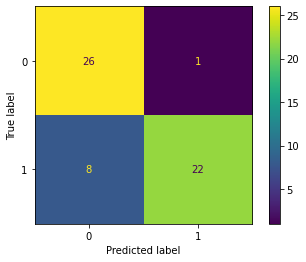

In [12]:
SVC = SVC(kernel='linear', random_state=0, probability=True)
SVC_model, SVC_cv, SVC_results = evaluate_model(SVC)

### 5. K Nearest Neighbours

Accuracy of model predicting from training data: 0.7841409691629956 

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.74      0.63        27
           1       0.67      0.47      0.55        30

    accuracy                           0.60        57
   macro avg       0.61      0.60      0.59        57
weighted avg       0.61      0.60      0.59        57



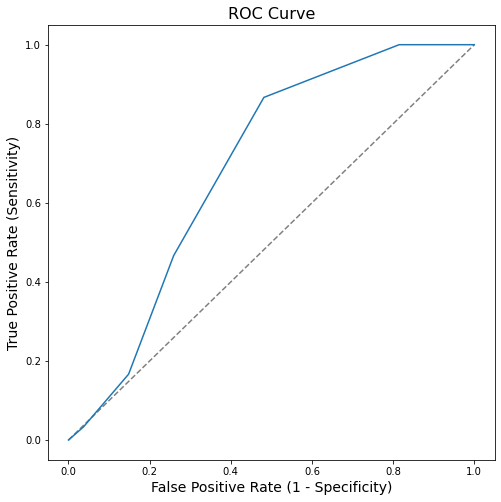

Confusion Matrix:
 [[20  7]
 [16 14]] 

Accuracy:  0.5964912280701754
Precision: 0.6666666666666666
Recall:    0.4666666666666667
AUC:       0.6913580246913581 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.64912281 0.61403509 0.59649123 0.68421053 0.64285714]
Average: 0.63734335839599
Standard Deviation: 0.03025842260207835


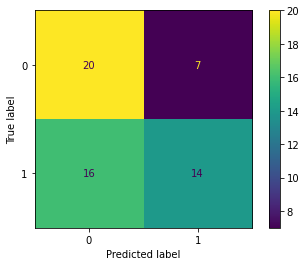

In [13]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN_model, KNN_cv, KNN_results = evaluate_model(KNN)

### 6. Neural Networks

Accuracy of model predicting from training data: 0.8546255506607929 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.92      0.77      0.84        30

    accuracy                           0.84        57
   macro avg       0.85      0.85      0.84        57
weighted avg       0.85      0.84      0.84        57



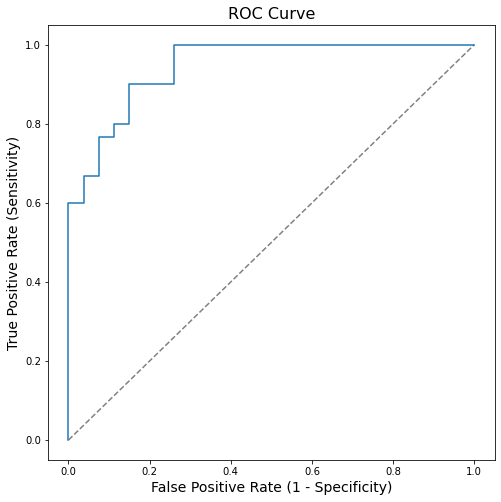

Confusion Matrix:
 [[25  2]
 [ 7 23]] 

Accuracy:  0.8421052631578947
Precision: 0.92
Recall:    0.7666666666666667
AUC:       0.945679012345679 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.71929825 0.8245614  0.80701754 0.78947368 0.75      ]
Average: 0.7780701754385964
Standard Deviation: 0.03839661162848997


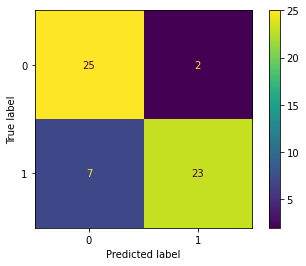

In [14]:
NN = MLPClassifier(random_state=0, max_iter=1000)
NN_model, NN_cv, NN_results = evaluate_model(NN)

### 7. Logistic Regression

Accuracy of model predicting from training data: 0.8414096916299559 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.96      0.77      0.85        30

    accuracy                           0.86        57
   macro avg       0.87      0.86      0.86        57
weighted avg       0.88      0.86      0.86        57



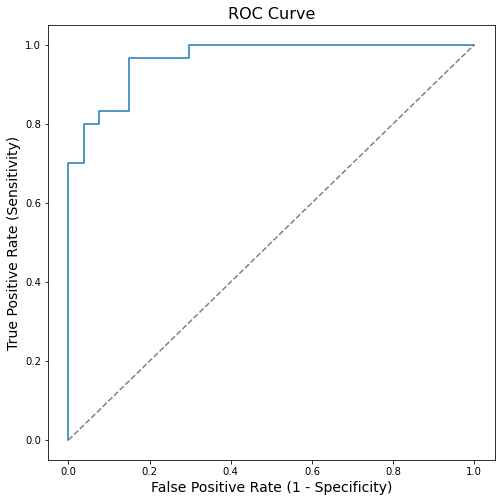

Confusion Matrix:
 [[26  1]
 [ 7 23]] 

Accuracy:  0.8596491228070176
Precision: 0.9583333333333334
Recall:    0.7666666666666667
AUC:       0.9641975308641976 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.78947368 0.85964912 0.78947368 0.85964912 0.78571429]
Average: 0.8167919799498747
Standard Deviation: 0.03501962601445327


C:\Users\forum\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


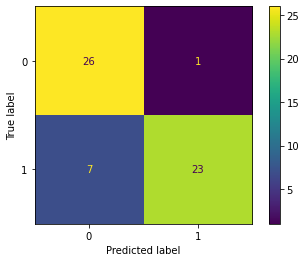

In [15]:
LR = LogisticRegression(max_iter=1000, random_state=0)
LR_model, LR_cv, LR_results = evaluate_model(LR)

Since accuracy scores for training and test data are similar, the Logistic Regression model is not overfitted to training data.

### 8. Gradient Boosting Trees

Accuracy of model predicting from training data: 0.973568281938326 

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.95      0.67      0.78        30

    accuracy                           0.81        57
   macro avg       0.84      0.81      0.80        57
weighted avg       0.84      0.81      0.80        57



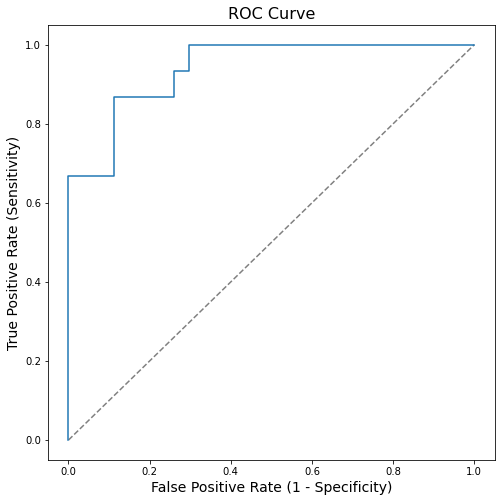

Confusion Matrix:
 [[26  1]
 [10 20]] 

Accuracy:  0.8070175438596491
Precision: 0.9523809523809523
Recall:    0.6666666666666666
AUC:       0.9407407407407408 

Confusion Matrix Heatmap:

Cross Validation
 Scores: [0.80701754 0.89473684 0.77192982 0.75438596 0.73214286]
Average: 0.7920426065162908
Standard Deviation: 0.0568874000135333


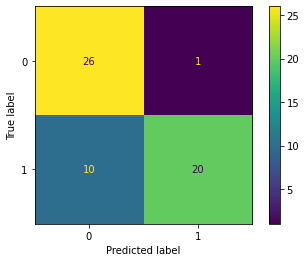

In [16]:
GB = GradientBoostingClassifier(random_state=0, n_estimators=50)
GB_model, GB_cv, GB_results = evaluate_model(GB)

### 9. Results are plotted

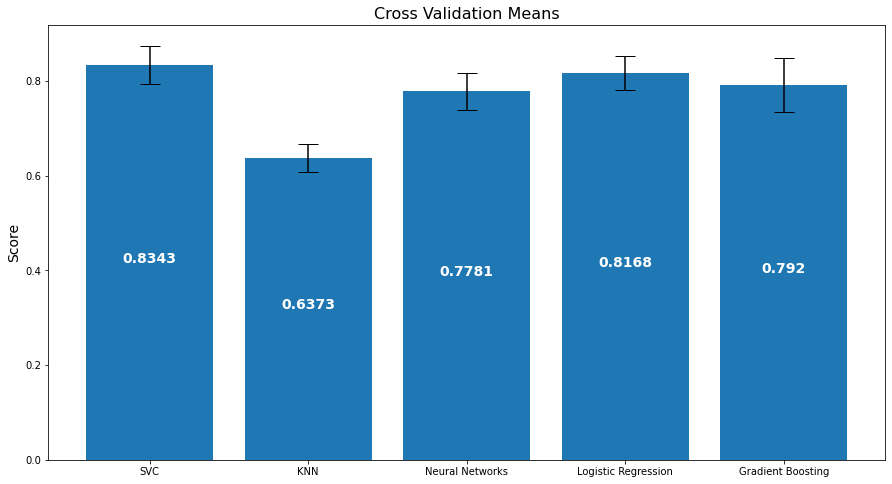

In [17]:
# Plotting cross Validation results
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

means = [SVC_cv.mean(), KNN_cv.mean(), NN_cv.mean(), LR_cv.mean(), GB_cv.mean()]
stds = [SVC_cv.std(), KNN_cv.std(), NN_cv.std(), LR_cv.std(), GB_cv.std()]

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(models))
ax.bar(x, means, yerr=stds, align='center', ecolor='black', capsize=10)

# Formatting the graph
ax.set_title('Cross Validation Means', fontsize=16)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

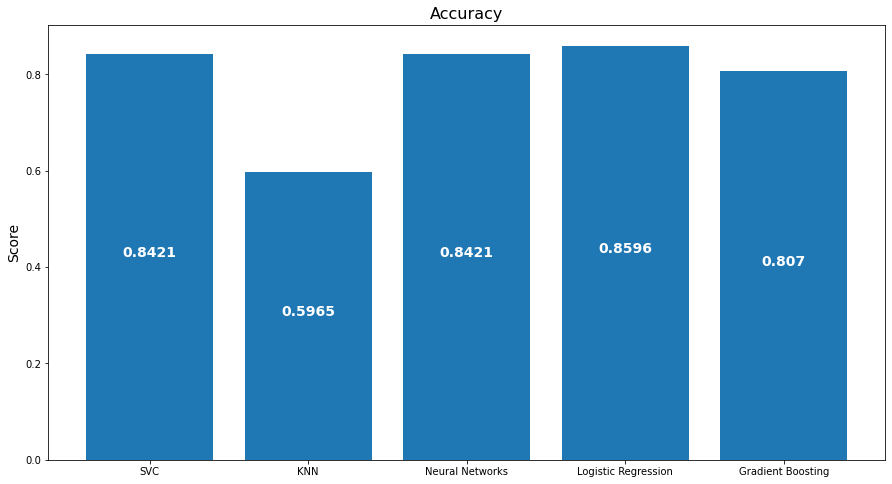

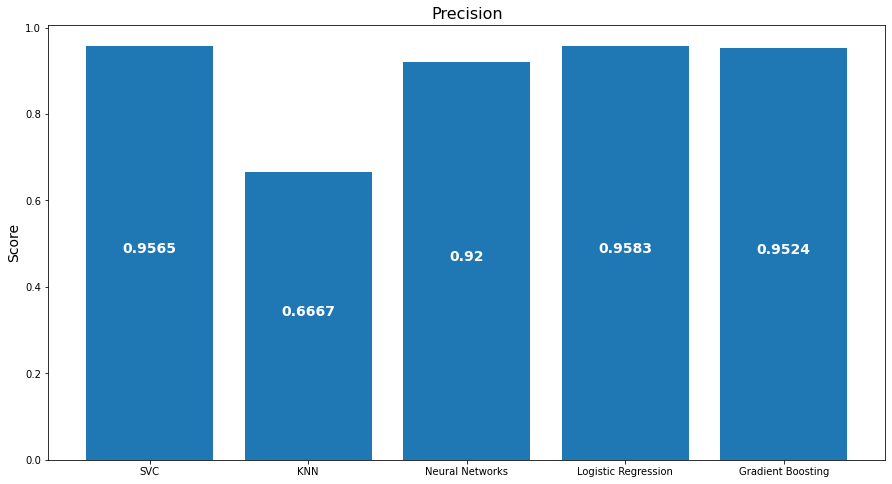

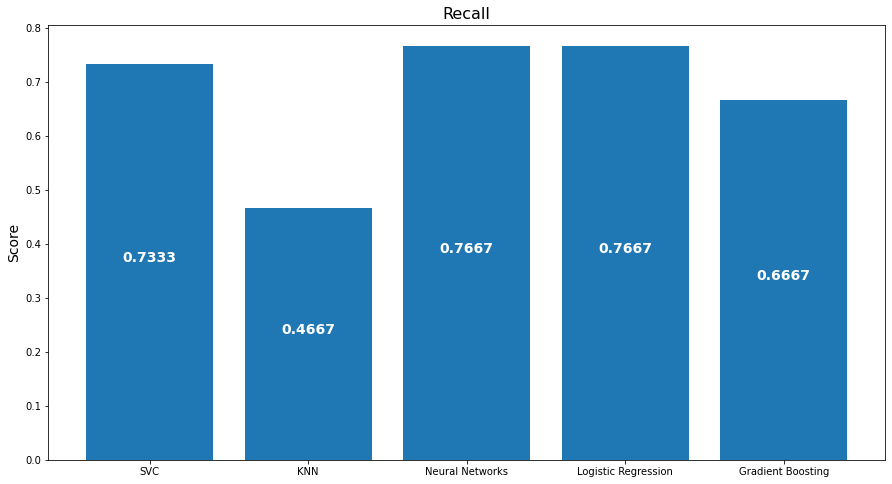

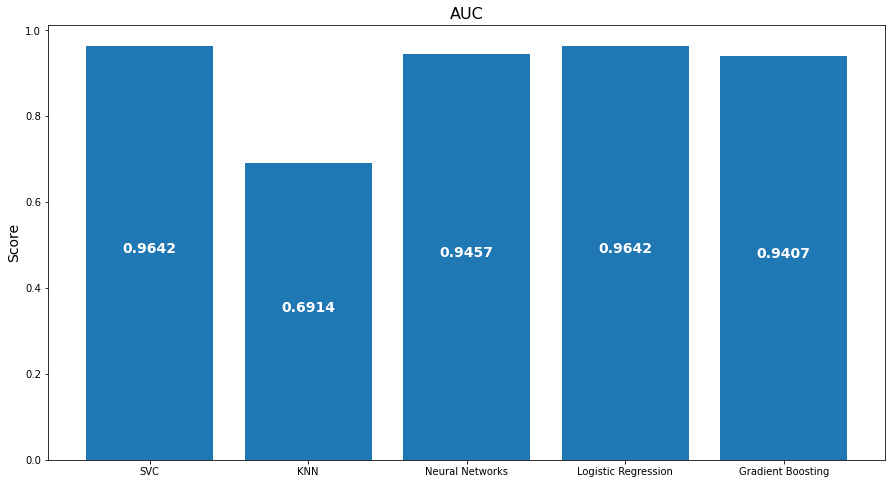

In [18]:
# Plotting confusion matrix metrics
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

for metric in range(len(SVC_results)):
    fig, ax = plt.subplots(figsize=(15, 8))
    x = np.arange(len(models))
    results = [SVC_results[metric], KNN_results[metric], NN_results[metric], LR_results[metric], GB_results[metric]]
    ax.bar(x, results)

    if metric == 0:
        ax.set_title('Accuracy', fontsize=16)
    elif metric == 1:
        ax.set_title('Precision', fontsize=16)
    elif metric == 2:
        ax.set_title('Recall', fontsize=16)
    elif metric == 3:
        ax.set_title('AUC', fontsize=16)

    ax.set_ylabel('Score', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=0)
    
    totals = []  # Contains the number of instances for each attribute
    for l in ax.patches:
        height = l.get_height()
        totals.append(height)
    total = sum(totals)

    # Arrange text within bars
    for l in ax.patches:
        width = l.get_width()
        height = l.get_height()
        x, y = l.get_xy()
        ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

### 10. Ensemble Learning

In [19]:
# Function 
def evaluate_ensemble_model(ensemble_model):
    
    # Training the model
    ensemble_model = ensemble_model.fit(X_train, y_train)
    
    # Generate test score
    test_score = ensemble_model.score(X_test, y_test)
    print('Test Score: %.4f' %test_score)
    
    # Generate training score
    train_score = ensemble_model.score(X_train, y_train)
    print('Train Score: %.4f' %train_score)
    
    results = [test_score, train_score]
    
    return(ensemble_model, results)

In [20]:
BG_SVC = BaggingClassifier(base_estimator=SVC, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_SVC_model, BG_SVC_results = evaluate_ensemble_model(BG_SVC)

Test Score: 0.8246
Train Score: 0.8590


In [21]:
BG_KNN = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_KNN_model, BG_KNN_results = evaluate_ensemble_model(BG_KNN)

Test Score: 0.5965
Train Score: 0.7401


In [22]:
BG_NN = BaggingClassifier(base_estimator=NN, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_NN_model, BG_NN_results = evaluate_ensemble_model(BG_NN)

Test Score: 0.8070
Train Score: 0.8458


In [23]:
BG_LR = BaggingClassifier(base_estimator=LR, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_LR_model, BG_LR_results = evaluate_ensemble_model(BG_LR)

Test Score: 0.8070
Train Score: 0.8590


In [24]:
BG_GB = BaggingClassifier(base_estimator=GB, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_GB_model, BG_GB_results = evaluate_ensemble_model(BG_GB)

Test Score: 0.7895
Train Score: 0.9207


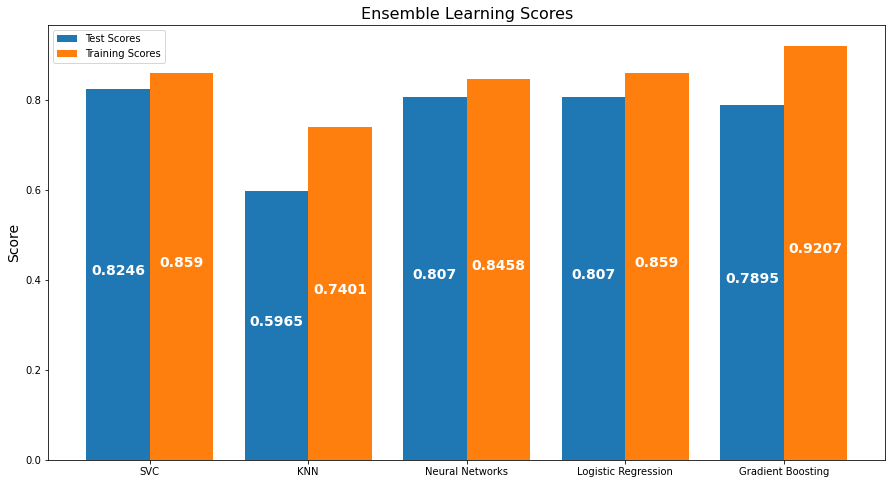

In [25]:
# Plotting cross Validation results
ensemble_models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

test_scores = [BG_SVC_results[0], BG_KNN_results[0], BG_NN_results[0], BG_LR_results[0], BG_GB_results[0]]
training_scores = [BG_SVC_results[1], BG_KNN_results[1], BG_NN_results[1], BG_LR_results[1], BG_GB_results[1]]

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(ensemble_models))
ax.bar(x-0.2, test_scores, width=0.4, align='center')
ax.bar(x+0.2, training_scores, width=0.4, align='center')

# Formatting the graph
ax.set_title('Ensemble Learning Scores', fontsize=16)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(ensemble_models, rotation=0)
ax.legend(labels=['Test Scores', 'Training Scores'])

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

<div class="mark">
    Bagging classifier is an ensemble classifier which is created using multiple estimators which can be trained using different sampling techniques including pasting (samples drawn without sampling), bagging or bootstrap aggregation (samples drawn with replacement), random subspaces (random features are drawn), random patches (random samples & features are drawn)
Bagging classifier helps reduce the variance of individual estimators by sampling technique and combining the predictions.
Consider using bagging classifier for algorithm which results in unstable classifiers (classifier having high variance). For example, decision tree results in construction of unstable classifier having high variance and low bias.
</div><i class="fa fa-lightbulb-o "></i>

### 11. Predictive System

In [ ]:
# Best model to predict 
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

In [27]:
# Instance 23 - Expected result: 0
test_user = (58,0,1,150,283,1,2,162,0,1,1,0,3)

# Preprocess input data
# Change tuple to a numpy array
array = np.asarray(test_user)

# Reshape array to predict for one instance
reshaped_array = array.reshape(1, -1)

SVC_predicted_value = SVC.predict(reshaped_array)
print(SVC_predicted_value)
KNN_predicted_value = KNN.predict(reshaped_array)
print(KNN_predicted_value)
NN_predicted_value = NN.predict(reshaped_array)
print(NN_predicted_value)
LR_predicted_value = LR.predict(reshaped_array)
print(LR_predicted_value)
GB_predicted_value = GB.predict(reshaped_array)
print(GB_predicted_value)

[0]
[0]
[0]
[0]
[0]


In [28]:
if (predicted_value == 0):
    print('Your chance of having Heart Disease is low.')
else:
    print('Please consult a doctor as a precaution.')

NameError: name 'predicted_value' is not defined